## 基于SVM的叫地主手牌二分类

In [1]:
import csv

li = []
with open('../dataset/call.csv', 'r') as f:
    lines = csv.reader(f)
    for i in lines:
        li.append(i)

In [2]:
import numpy as np
data = np.array(li, dtype=int)

In [3]:
call_cnt = sum(data[:,-1])
call_cnt

1606

In [4]:
call_cnt / len(data)

0.3967391304347826

In [5]:
data.shape

(4048, 18)

In [6]:
cd ../duguai

D:\stuspace\du-guai\duguai


In [7]:
import sys
sys.path.append('..')

In [8]:
from duguai.ai import process
from sklearn.preprocessing import StandardScaler
X = np.array([process(i) for i in data[:,:-1]])
y = data[:,-1]

standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X)
standardScaler.scale_

array([1.02556338, 0.29399838, 0.90237814])

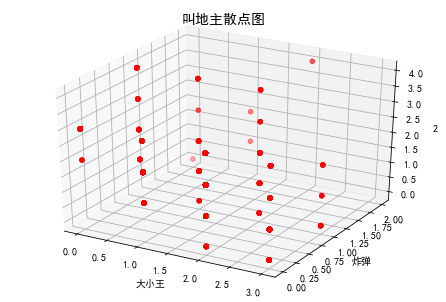

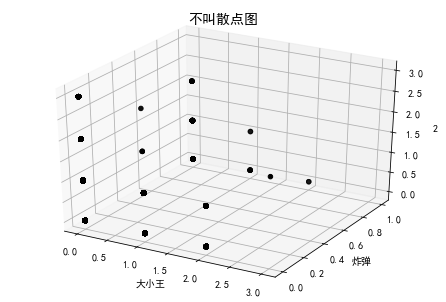

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['font.sans-serif']=['SimHei']

def figure(y_res, color, title):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(X[y == y_res, 0], X[y == y_res, 1], X[y == y_res, 2], color=color)
    ax.set_title(title, size=14)
    ax.set_zlabel('2')
    ax.set_ylabel('炸弹')
    ax.set_xlabel('大小王')


figure(1, 'red', '叫地主散点图')    
figure(0, 'black', '不叫散点图') 

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC

from sklearn.model_selection import GridSearchCV
param_grid = {'C': [5e-05 + 0.0000001 * i for i in range(400)]}
svc = LinearSVC()
clf = GridSearchCV(svc, param_grid, cv=5)
clf.fit(X_standard, y)
clf.best_score_

0.9323122529644269

In [11]:
clf.best_params_

{'C': 5.24e-05}

In [12]:
svc = LinearSVC(5.24e-05)
svc.n_iter_ = 7
svc.coef_ = np.array([[0.19581239, 0.03330529, 0.10988893]])
svc.classes_ = np.array([0, 1])
svc.intercept_ = np.array([-0.06151605])
svc.score(X_standard, y)

0.9323122529644269